In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pySankey.sankey import sankey
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [9]:
font_prop = FontProperties(fname='/Users/vivektiwari/Library/Fonts/Poppins-Regular.ttf')
font_prop_bold = FontProperties(fname='/Users/vivektiwari/Library/Fonts/LEMONMILK-Bold.otf')

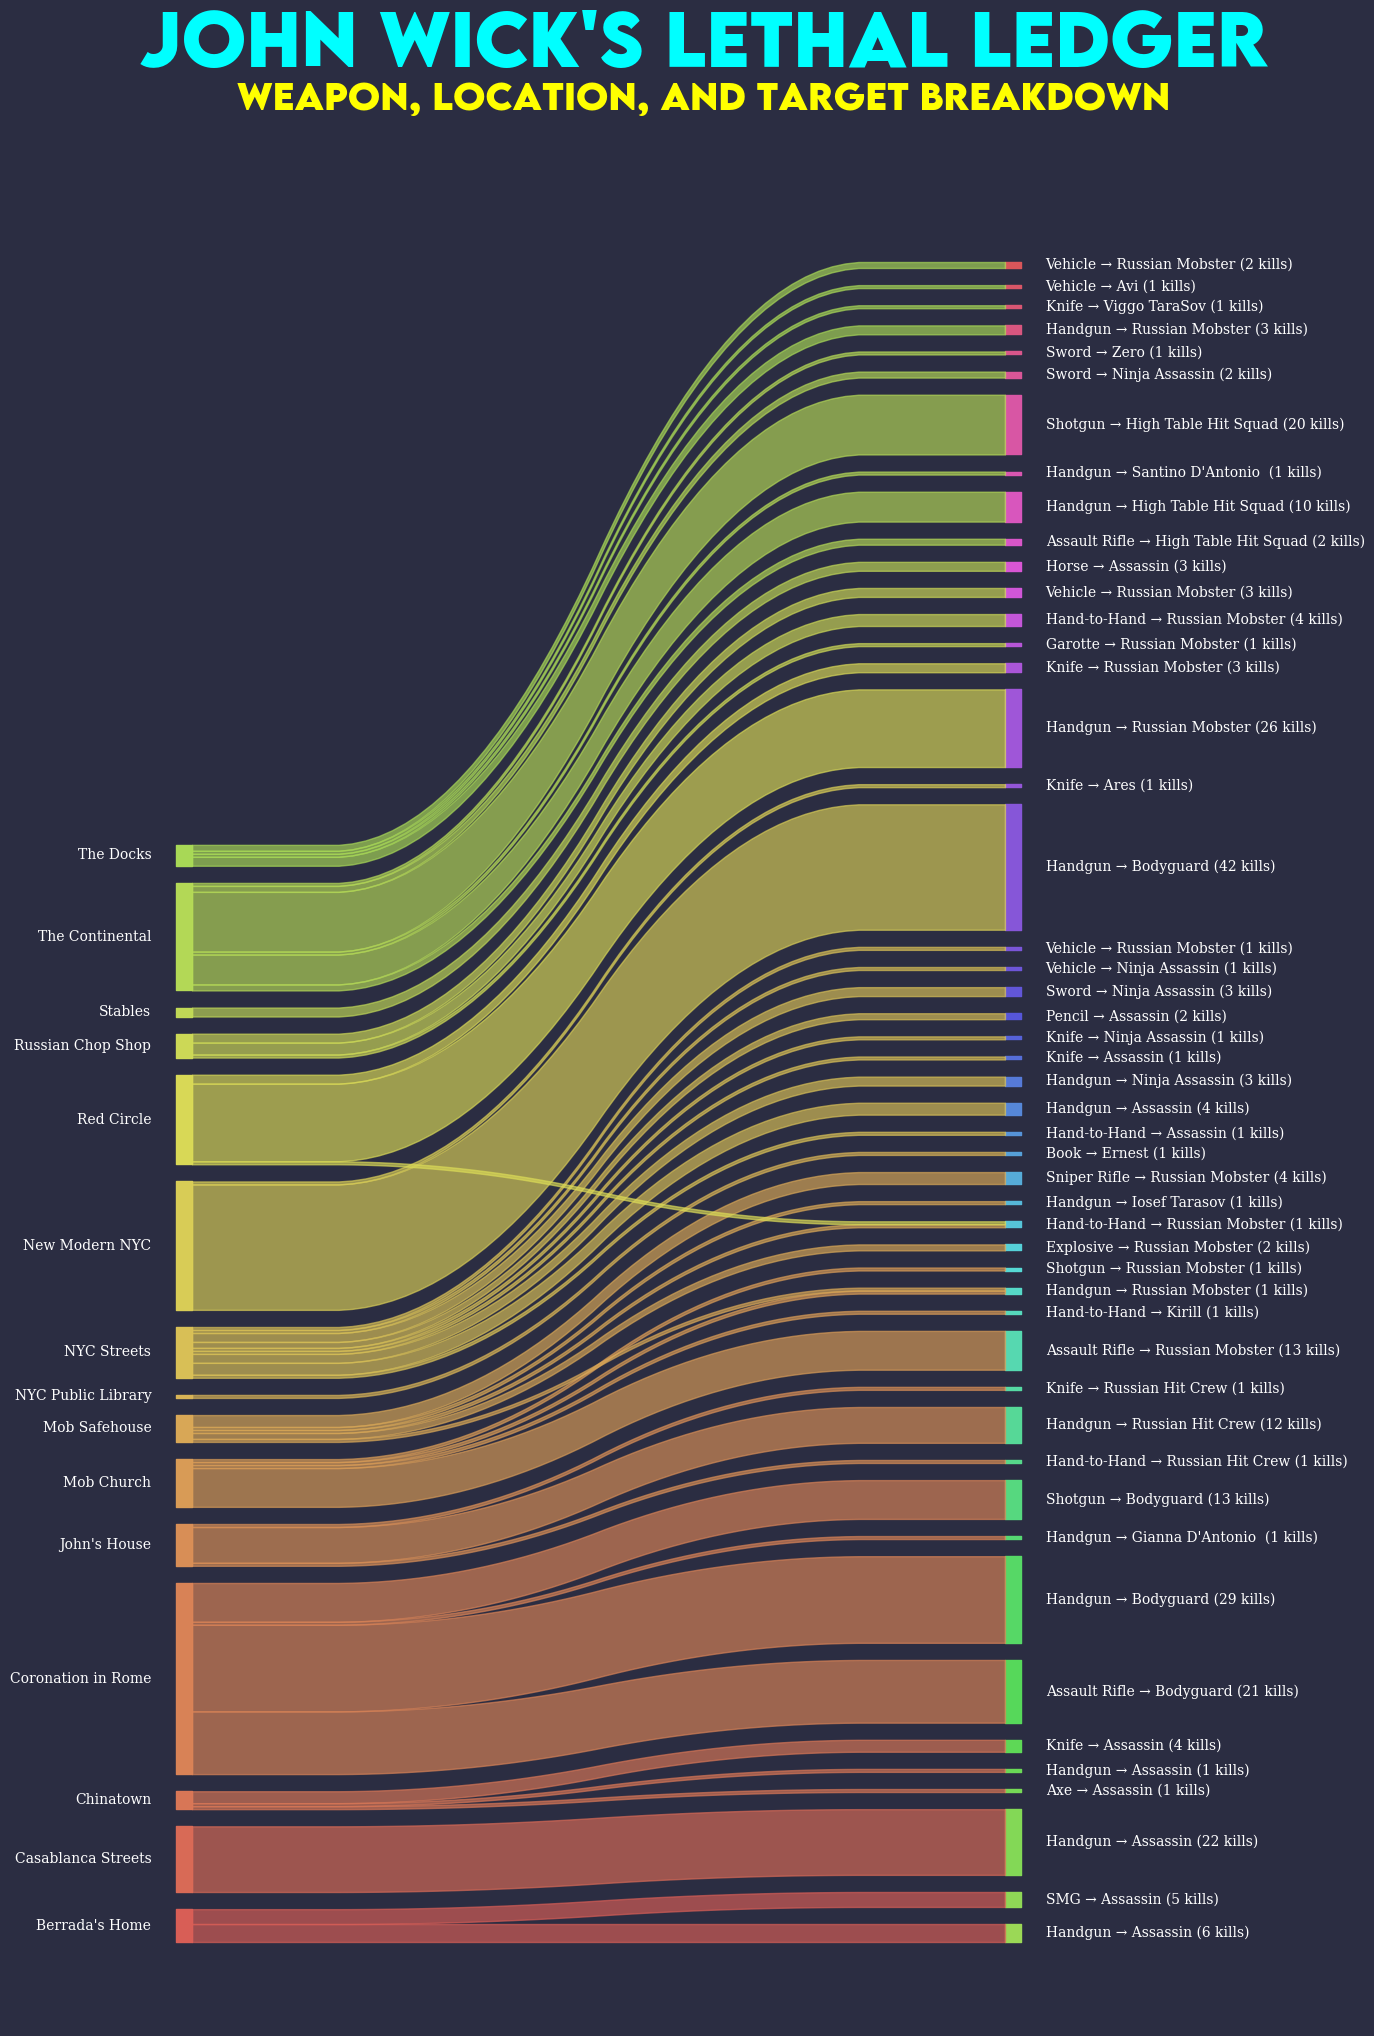

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pySankey.sankey import sankey

# Load your dataset
df = pd.read_csv("John Wick.csv")

#replace df['Where'] where it is The Continential to The Continental
df['Where'] = df['Where'].replace(['The Continential'], 'The Continental')

# Aggregate the data and count the number of kills for each combination of location, weapon, and target
df_aggregated = df.groupby(['Where', 'Weapon', 'Who']).size().reset_index(name='Kill Count')

# Calculate total kills for each location
total_kills_by_location = df_aggregated.groupby('Where')['Kill Count'].sum().reset_index(name='Total Kills')

# Sort locations by total kills
sorted_locations = total_kills_by_location.sort_values(by='Total Kills', ascending=False)

# Merge the sorted locations back to the aggregated data
df_aggregated = df_aggregated.merge(sorted_locations[['Where']], on='Where', how='left')

# Concatenate 'Weapon', 'Who', and 'Kill Count' into a single category
df_aggregated['Weapon_Who_Count'] = df_aggregated['Weapon'] + " → " + df_aggregated['Who'] + " (" + df_aggregated['Kill Count'].astype(str) + " kills)"

# Generate the Sankey diagram
sankey(
    left=df_aggregated["Where"],
    right=df_aggregated["Weapon_Who_Count"],
    leftWeight=df_aggregated["Kill Count"],
    rightWeight=df_aggregated["Kill Count"],
    aspect=20, fontsize=10
)

# Customize the plot
fig = plt.gcf()
fig.set_size_inches(12, 24)
fig.set_facecolor("#2b2d42")
plt.rcParams['text.color'] = 'white'


# Set the main title with a specific color
title_text = "John Wick's Lethal Ledger"
plt.text(0.6, 0.95, title_text, fontproperties=font_prop_bold, color='cyan', fontsize=50, ha='center', va='top', transform=fig.transFigure)

# Set the subtitle with a different color
subtitle_text = "Weapon, Location, and Target Breakdown"
plt.text(0.6, 0.92, subtitle_text, fontproperties=font_prop_bold, color='yellow', fontsize=25, ha='center', va='top', transform=fig.transFigure)

#save the plot
plt.savefig('John Wick1.png', dpi=300, bbox_inches='tight')

